# Leer el Dataset homes.csv

In [1421]:
#Importando las librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [1422]:
#Impoprtando el dataset
missing_values = ["n/a", "na", "--"]
dataset = pd.read_csv('wines.csv',na_values = missing_values)

# Explorar los datos para obtener ideas.

In [1423]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [1424]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [1425]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [1426]:
dataset.shape

(1599, 12)

In [1427]:
dataset["free sulfur dioxide"].value_counts()

6.0     138
5.0     104
10.0     79
15.0     78
12.0     75
7.0      71
9.0      62
16.0     61
17.0     60
11.0     59
13.0     57
8.0      56
14.0     50
3.0      49
18.0     46
4.0      41
21.0     41
19.0     39
24.0     34
26.0     32
23.0     32
20.0     30
27.0     29
25.0     24
29.0     23
28.0     23
22.0     22
32.0     22
31.0     20
34.0     18
30.0     16
35.0     15
36.0     11
33.0     11
38.0      9
41.0      7
40.0      6
39.0      5
48.0      4
51.0      4
45.0      3
1.0       3
43.0      3
42.0      3
52.0      3
37.0      3
68.0      2
55.0      2
50.0      2
37.5      2
53.0      1
72.0      1
57.0      1
47.0      1
5.5       1
2.0       1
46.0      1
54.0      1
40.5      1
66.0      1
Name: free sulfur dioxide, dtype: int64

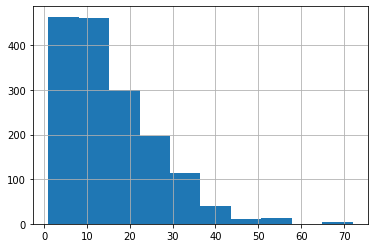

In [1428]:
dataset["free sulfur dioxide"].hist()

In [1429]:
dataset["free_sulfur_dioxide_cat"]= pd.cut(dataset["free sulfur dioxide"],
                               bins=[0,10,20,30,40,50,60,np.inf],
                               labels=[1,2,3,4,5,6,7])
dataset["free_sulfur_dioxide_cat"].value_counts()

1    605
2    555
3    276
4    122
5     25
6     12
7      4
Name: free_sulfur_dioxide_cat, dtype: int64

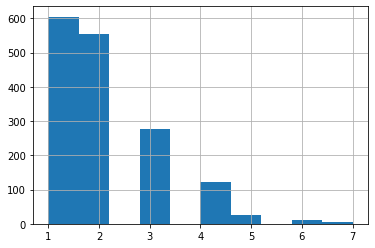

In [1430]:
dataset["free_sulfur_dioxide_cat"].hist()

# Preparar los datos para exponer mejor los patrones de datos subyacentes a los algoritmos de aprendizaje automático.

In [1431]:
#Variables independientes
X = dataset.drop("quality", axis=1)
#Variables dependientes
y =  dataset["quality"]

# Generar el conjunto de prueba.

In [1432]:
#Splitting the data set into the training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=1)

In [1433]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,free_sulfur_dioxide_cat
701,7.0,0.650,0.02,2.1,0.066,8.0,25.0,0.99720,3.47,0.67,9.5,1
56,10.2,0.420,0.57,3.4,0.070,4.0,10.0,0.99710,3.04,0.63,9.6,1
142,5.2,0.340,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,3
863,7.2,0.620,0.06,2.5,0.078,17.0,84.0,0.99746,3.51,0.53,9.7,2
1387,7.4,0.640,0.07,1.8,0.100,8.0,23.0,0.99610,3.30,0.58,9.6,1
...,...,...,...,...,...,...,...,...,...,...,...,...
715,7.2,0.490,0.18,2.7,0.069,13.0,34.0,0.99670,3.29,0.48,9.2,2
905,9.2,0.580,0.20,3.0,0.081,15.0,115.0,0.99800,3.23,0.59,9.5,2
1096,6.6,0.725,0.09,5.5,0.117,9.0,17.0,0.99655,3.35,0.49,10.8,1
235,7.2,0.630,0.00,1.9,0.097,14.0,38.0,0.99675,3.37,0.58,9.0,2


In [1434]:
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,free_sulfur_dioxide_cat
75,8.8,0.41,0.64,2.2,0.093,9.0,42.0,0.99860,3.54,0.66,10.5,1
1283,8.7,0.63,0.28,2.7,0.096,17.0,69.0,0.99734,3.26,0.63,10.2,2
408,10.4,0.34,0.58,3.7,0.174,6.0,16.0,0.99700,3.19,0.70,11.3,1
1281,7.1,0.46,0.20,1.9,0.077,28.0,54.0,0.99560,3.37,0.64,10.4,3
1118,7.1,0.39,0.12,2.1,0.065,14.0,24.0,0.99252,3.30,0.53,13.3,2
...,...,...,...,...,...,...,...,...,...,...,...,...
890,7.2,0.34,0.24,2.0,0.071,30.0,52.0,0.99576,3.44,0.58,10.1,3
146,5.8,0.68,0.02,1.8,0.087,21.0,94.0,0.99440,3.54,0.52,10.0,3
1551,7.1,0.67,0.00,2.3,0.083,18.0,27.0,0.99768,3.44,0.54,9.4,2
1209,6.2,0.39,0.43,2.0,0.071,14.0,24.0,0.99428,3.45,0.87,11.2,2


In [1435]:
y_train

701     6
56      5
142     6
863     5
1387    5
       ..
715     6
905     5
1096    6
235     6
1061    8
Name: quality, Length: 1279, dtype: int64

In [1436]:
y_test

75      5
1283    6
408     6
1281    6
1118    6
       ..
890     5
146     5
1551    5
1209    7
1220    6
Name: quality, Length: 320, dtype: int64

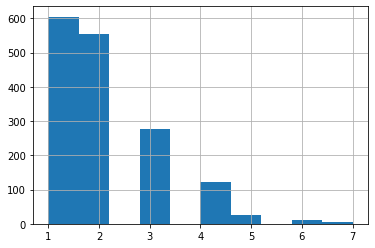

In [1437]:
dataset['free_sulfur_dioxide_cat'].hist()

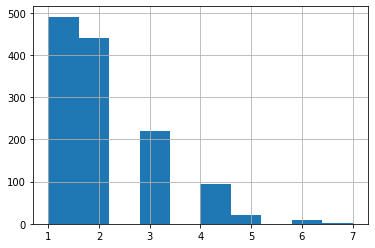

In [1438]:
X_train["free_sulfur_dioxide_cat"].hist()

In [1439]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(dataset, dataset["free_sulfur_dioxide_cat"]):
    strat_train_set = dataset.loc[train_index]
    strat_test_set = dataset.loc[test_index]

In [1440]:
strat_test_set["free_sulfur_dioxide_cat"].value_counts() / len(strat_test_set)

1    0.378125
2    0.346875
3    0.171875
4    0.078125
5    0.015625
6    0.006250
7    0.003125
Name: free_sulfur_dioxide_cat, dtype: float64

In [1441]:
dataset["free_sulfur_dioxide_cat"].value_counts() / len(dataset)

1    0.378361
2    0.347092
3    0.172608
4    0.076298
5    0.015635
6    0.007505
7    0.002502
Name: free_sulfur_dioxide_cat, dtype: float64

In [1442]:
def free_sulfur_dioxide_cat_proportions(data):
    return data["free_sulfur_dioxide_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": free_sulfur_dioxide_cat_proportions(dataset),
    "Stratified": free_sulfur_dioxide_cat_proportions(strat_test_set),
    "Random": free_sulfur_dioxide_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [1443]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("free_sulfur_dioxide_cat", axis=1, inplace=True)

# Visualización de los datos

In [1444]:
dataset = strat_train_set.copy()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2650a4f890>,
      dtype=object)

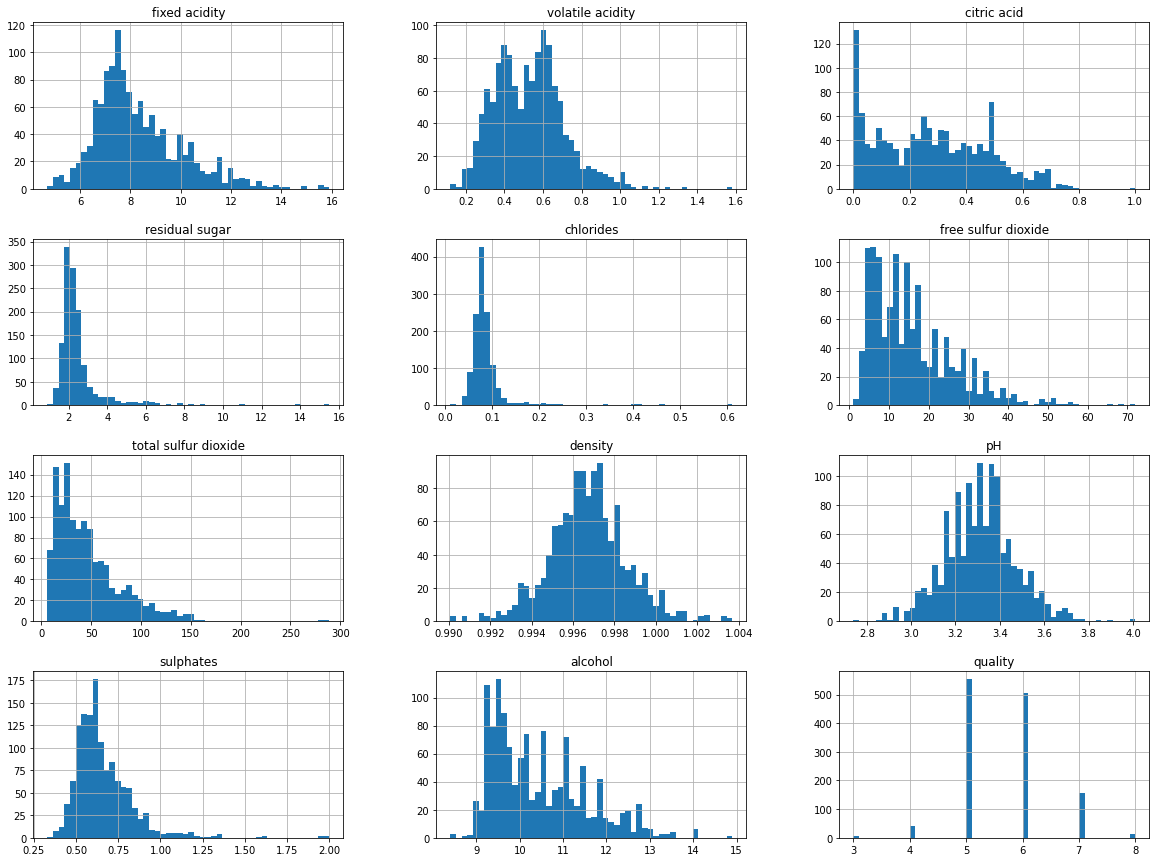

In [1445]:
dataset.hist(bins=50, figsize=(20,15))

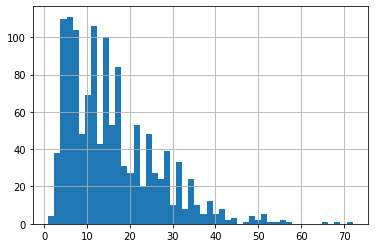

In [1446]:
dataset['free sulfur dioxide'].hist(bins=50)

In [1447]:
#matriz de correlacion
corr_matrix = dataset.corr()
corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.490562
sulphates               0.248939
citric acid             0.220403
fixed acidity           0.117688
residual sugar          0.025148
free sulfur dioxide    -0.035671
pH                     -0.042103
chlorides              -0.133082
total sulfur dioxide   -0.172898
density                -0.185599
volatile acidity       -0.391533
Name: quality, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f263e3d2c90>,
      dtype=object)

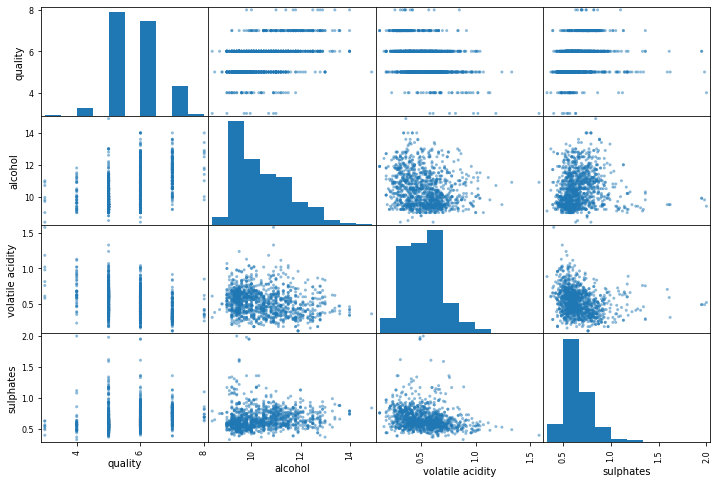

In [1448]:
from pandas.plotting import scatter_matrix

attributes = ["quality","alcohol", "volatile acidity", "sulphates"]
scatter_matrix(dataset[attributes], figsize=(12, 8))

# Preparar los datos para exponer mejor los patrones de datos subyacentes a los algoritmos de aprendizaje automático.



In [1449]:
dataset_copy = dataset.drop("quality", axis=1)
dataset_labels =  strat_train_set["quality"].copy()

In [1450]:
incomplete_rows = dataset_copy[dataset_copy.isnull().any(axis=1)].head()
incomplete_rows

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol


In [1451]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [1452]:
homes_num = dataset_copy.select_dtypes(include=[np.number])
imputer.fit(homes_num)

SimpleImputer(strategy='median')

In [1453]:
imputer.statistics_

array([ 7.9    ,  0.52   ,  0.26   ,  2.2    ,  0.079  , 14.     ,
       38.     ,  0.99675,  3.31   ,  0.62   , 10.2    ])

In [1454]:
homes_num.median().values

array([ 7.9    ,  0.52   ,  0.26   ,  2.2    ,  0.079  , 14.     ,
       38.     ,  0.99675,  3.31   ,  0.62   , 10.2    ])

In [1455]:
X = imputer.transform(homes_num)

In [1456]:
homes_tr = pd.DataFrame(X, columns=homes_num.columns,
                          index=dataset_copy.index)

In [1457]:
homes_tr.loc[incomplete_rows.index.values]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol


In [1458]:
imputer.strategy

'median'

In [1459]:
homes_tr = pd.DataFrame(X, columns=homes_num.columns,
                          index=homes_num.index)
homes_tr.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
644,9.9,0.54,0.45,2.3,0.071,16.0,40.0,0.99910,3.39,0.62,9.4
1267,10.4,0.43,0.50,2.3,0.068,13.0,19.0,0.99600,3.10,0.87,11.4
1028,7.2,0.34,0.21,2.5,0.075,41.0,68.0,0.99586,3.37,0.54,10.1
1065,7.7,0.61,0.18,2.4,0.083,6.0,20.0,0.99630,3.29,0.60,10.2
833,11.6,0.47,0.44,1.6,0.147,36.0,51.0,0.99836,3.38,0.86,9.9


In [1460]:
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
644,9.9,0.54,0.45,2.3,0.071,16.0,40.0,0.99910,3.39,0.62,9.4,5
1267,10.4,0.43,0.50,2.3,0.068,13.0,19.0,0.99600,3.10,0.87,11.4,6
1028,7.2,0.34,0.21,2.5,0.075,41.0,68.0,0.99586,3.37,0.54,10.1,6
1065,7.7,0.61,0.18,2.4,0.083,6.0,20.0,0.99630,3.29,0.60,10.2,6
833,11.6,0.47,0.44,1.6,0.147,36.0,51.0,0.99836,3.38,0.86,9.9,4
...,...,...,...,...,...,...,...,...,...,...,...,...
694,9.0,0.47,0.31,2.7,0.084,24.0,125.0,0.99840,3.31,0.61,9.4,5
1257,7.0,0.58,0.28,4.8,0.085,12.0,69.0,0.99633,3.32,0.70,11.0,6
309,7.4,0.29,0.38,1.7,0.062,9.0,30.0,0.99680,3.41,0.53,9.5,6
233,6.9,0.52,0.25,2.6,0.081,10.0,37.0,0.99685,3.46,0.50,11.0,5


In [1461]:
def feature_engineering(data):
    data["citric_acid_per_density"]=data["citric acid"]/data["density"]
    data["ph_per_density"]=data["pH"]/data["density"]
    return data

In [1462]:
homes_feature_engineered = feature_engineering(dataset_copy)
homes_feature_engineered

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,citric_acid_per_density,ph_per_density
644,9.9,0.54,0.45,2.3,0.071,16.0,40.0,0.99910,3.39,0.62,9.4,0.450405,3.393054
1267,10.4,0.43,0.50,2.3,0.068,13.0,19.0,0.99600,3.10,0.87,11.4,0.502008,3.112450
1028,7.2,0.34,0.21,2.5,0.075,41.0,68.0,0.99586,3.37,0.54,10.1,0.210873,3.384010
1065,7.7,0.61,0.18,2.4,0.083,6.0,20.0,0.99630,3.29,0.60,10.2,0.180668,3.302218
833,11.6,0.47,0.44,1.6,0.147,36.0,51.0,0.99836,3.38,0.86,9.9,0.440723,3.385552
...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,9.0,0.47,0.31,2.7,0.084,24.0,125.0,0.99840,3.31,0.61,9.4,0.310497,3.315304
1257,7.0,0.58,0.28,4.8,0.085,12.0,69.0,0.99633,3.32,0.70,11.0,0.281031,3.332229
309,7.4,0.29,0.38,1.7,0.062,9.0,30.0,0.99680,3.41,0.53,9.5,0.381220,3.420947
233,6.9,0.52,0.25,2.6,0.081,10.0,37.0,0.99685,3.46,0.50,11.0,0.250790,3.470933


In [1463]:
from sklearn.base import BaseEstimator, TransformerMixin

col_names = "citric acid", "density", "pH"
citric_acid_ix, density_ix, pH_ix = [dataset.columns.get_loc(c) for c in col_names]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_citric_acid_per_density=True):
        self.add_citric_acid_per_density = add_citric_acid_per_density
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        ph_per_density = X[:, density_ix] / X[:, pH_ix]
        if self.add_citric_acid_per_density:
            citric_acid_per_density = X[:, citric_acid_ix] / X[:, pH_ix]
            return np.c_[X, ph_per_density, citric_acid_per_density]
        else:
            return np.c_[X, ph_per_density]

attr_adder = CombinedAttributesAdder(add_citric_acid_per_density=False)
homes_extra_attribs = attr_adder.transform(dataset.values)

homes_extra_attribs = pd.DataFrame(
    homes_extra_attribs,
    columns=list(dataset.columns)+["ph_per_density"],
    index=dataset.index)
homes_extra_attribs.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,ph_per_density
644,9.9,0.54,0.45,2.3,0.071,16.0,40.0,0.99910,3.39,0.62,9.4,5.0,0.294720
1267,10.4,0.43,0.50,2.3,0.068,13.0,19.0,0.99600,3.10,0.87,11.4,6.0,0.321290
1028,7.2,0.34,0.21,2.5,0.075,41.0,68.0,0.99586,3.37,0.54,10.1,6.0,0.295507
1065,7.7,0.61,0.18,2.4,0.083,6.0,20.0,0.99630,3.29,0.60,10.2,6.0,0.302827
833,11.6,0.47,0.44,1.6,0.147,36.0,51.0,0.99836,3.38,0.86,9.9,4.0,0.295373


In [1464]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

homes_num_tr = num_pipeline.fit_transform(homes_num)
homes_num_tr

array([[ 0.91823784,  0.07017826,  0.91575616, ..., -0.95402186,
        -0.46804655,  0.79456957],
       [ 1.20635575, -0.5432656 ,  1.17314027, ...,  0.9090356 ,
         1.35349806,  1.25843571],
       [-0.63759884, -1.0451742 , -0.31968757, ..., -0.30195175,
        -0.4140489 , -0.34984463],
       ...,
       [-0.52235168, -1.32401232,  0.55541841, ..., -0.86086899,
        -0.63278753,  0.44835675],
       [-0.81046958, -0.04135699, -0.11378028, ...,  0.53642411,
        -0.92138894, -0.1883306 ],
       [ 1.09110859, -0.20865986,  1.84233896, ...,  1.9337172 ,
         0.95263747,  1.87715388]])

In [1465]:
from sklearn.compose import ColumnTransformer

num_attribs = list(homes_num)

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
])

homes_prepared = full_pipeline.fit_transform(dataset_copy)
homes_prepared

array([[ 0.91823784,  0.07017826,  0.91575616, ..., -0.95402186,
        -0.46804655,  0.79456957],
       [ 1.20635575, -0.5432656 ,  1.17314027, ...,  0.9090356 ,
         1.35349806,  1.25843571],
       [-0.63759884, -1.0451742 , -0.31968757, ..., -0.30195175,
        -0.4140489 , -0.34984463],
       ...,
       [-0.52235168, -1.32401232,  0.55541841, ..., -0.86086899,
        -0.63278753,  0.44835675],
       [-0.81046958, -0.04135699, -0.11378028, ...,  0.53642411,
        -0.92138894, -0.1883306 ],
       [ 1.09110859, -0.20865986,  1.84233896, ...,  1.9337172 ,
         0.95263747,  1.87715388]])

In [1466]:
homes_prepared.shape

(1279, 13)

# Explorar muchos modelos diferentes y preseleccionar los mejores.[texto del enlace

###Regresion lineal

In [1467]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

In [1468]:
model_lin_reg = Pipeline([
    ("full_pipeline", full_pipeline),
    ("lin_reg", LinearRegression())
])
model_lin_reg.fit(X_train, y_train)

Pipeline(steps=[('full_pipeline',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   CombinedAttributesAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['fixed acidity',
                                                   'volatile acidity',
                                                   'citric acid',
                                                   'residual sugar',
                                                   'chlorides',
                                           

In [1469]:
#preguntar el porque va el :5
some_data = X_test.iloc[:5]

print("Predicción (Regresión Linear):", model_lin_reg.predict(some_data))

Predicción (Regresión Linear): [5.32183639 5.39987216 6.14045846 5.75539043 6.71780814]


### Validación cruzada (Regresión Lineal)

In [1470]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [1471]:
from sklearn.model_selection import cross_val_score

lin_scores = cross_val_score(model_lin_reg, X_test, y_test, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

display_scores(lin_rmse_scores)

Scores: [0.54399034 0.63727153 0.49051291 0.55072304 0.62777793 0.78189826
 0.62232178 0.78831589 0.73970525 0.53866591]
Mean: 0.6321182846316216
Standard deviation: 0.10085891250029727


### Decision Tree Regressor

In [1472]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)

In [1473]:
model_tree_reg = Pipeline([
    ("full_pipeline", full_pipeline),
    ("tree_reg", tree_reg)
])
model_tree_reg.fit(X_train, y_train)

Pipeline(steps=[('full_pipeline',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   CombinedAttributesAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['fixed acidity',
                                                   'volatile acidity',
                                                   'citric acid',
                                                   'residual sugar',
                                                   'chlorides',
                                           

In [1474]:
print("Predicción (Desicion Tree):", model_tree_reg.predict(some_data))

Predicción (Desicion Tree): [5. 5. 7. 6. 5.]


In [1475]:
list(y_test.iloc[:5])

[5, 6, 6, 6, 6]

### Validación cruzada (Desicion Tree)

In [1476]:
tree_scores = cross_val_score(model_tree_reg, X_test, y_test, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)

display_scores(tree_rmse_scores)

Scores: [0.88388348 0.66143783 0.6846532  0.96824584 0.96824584 0.84779125
 0.88388348 1.03077641 1.03077641 0.90138782]
Mean: 0.8861081530283169
Standard deviation: 0.12170596179622829


### Random Forest Regressor

In [1477]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)

In [1478]:
model_forest_reg = Pipeline([
    ("full_pipeline", full_pipeline),
    ("forest_reg", forest_reg)
])
model_forest_reg.fit(X_train, y_train)

Pipeline(steps=[('full_pipeline',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   CombinedAttributesAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['fixed acidity',
                                                   'volatile acidity',
                                                   'citric acid',
                                                   'residual sugar',
                                                   'chlorides',
                                           

In [1479]:
print("Predicción (Random Forest):", model_forest_reg.predict(some_data))

Predicción (Random Forest): [5.4 5.7 6.5 5.8 6. ]


In [1480]:
list(y_test.iloc[:5])

[5, 6, 6, 6, 6]

### Validación cruzada (Random Forest)

In [1481]:
forest_scores = cross_val_score(model_forest_reg, X_test, y_test, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

display_scores(forest_rmse_scores)

Scores: [0.53648159 0.58816452 0.50124844 0.6726812  0.69394704 0.81891697
 0.67244888 0.82594643 0.79647662 0.68579334]
Mean: 0.6792105028663322
Standard deviation: 0.10746205281895625


# Afinar los modelos.

### Grid Search

In [1482]:
from sklearn.model_selection import GridSearchCV

n_estimators = [3, 10, 30]
max_features = [2, 4, 6, 8]
bootstrap = [False]
min_samples_split = [3, 10]
max_depth = [2, 3, 4]

param_grid = [
  {
    'forest_reg__n_estimators': n_estimators,
    'forest_reg__max_features': max_features
  },
  {
    'forest_reg__bootstrap': bootstrap,
    'forest_reg__min_samples_split': min_samples_split,
    'forest_reg__max_depth': max_depth
  }
]

grid_search = GridSearchCV(model_forest_reg, param_grid=param_grid, cv=10, scoring="neg_mean_squared_error", n_jobs=1, verbose=2)

In [1483]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
[CV] END forest_reg__max_features=2, forest_reg__n_estimators=3; total time=   0.0s
[CV] END forest_reg__max_features=2, forest_reg__n_estimators=3; total time=   0.0s
[CV] END forest_reg__max_features=2, forest_reg__n_estimators=3; total time=   0.0s
[CV] END forest_reg__max_features=2, forest_reg__n_estimators=3; total time=   0.0s
[CV] END forest_reg__max_features=2, forest_reg__n_estimators=3; total time=   0.0s
[CV] END forest_reg__max_features=2, forest_reg__n_estimators=3; total time=   0.0s
[CV] END forest_reg__max_features=2, forest_reg__n_estimators=3; total time=   0.0s
[CV] END forest_reg__max_features=2, forest_reg__n_estimators=3; total time=   0.0s
[CV] END forest_reg__max_features=2, forest_reg__n_estimators=3; total time=   0.0s
[CV] END forest_reg__max_features=2, forest_reg__n_estimators=3; total time=   0.0s
[CV] END forest_reg__max_features=2, forest_reg__n_estimators=10; total time=   0.0s
[CV] END for

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('full_pipeline',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('attribs_adder',
                                                                                          CombinedAttributesAdder()),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['fixed '
                                                                          'acidity',
         

In [1484]:
grid_search.best_params_

{'forest_reg__max_features': 8, 'forest_reg__n_estimators': 30}

In [1485]:
forest_reg = RandomForestRegressor(random_state=42, max_features=8, n_estimators=30)

In [1486]:
model_forest_reg = Pipeline([
    ("full_pipeline", full_pipeline),
    ("forest_reg", forest_reg)
])
model_forest_reg.fit(X_train, y_train)

Pipeline(steps=[('full_pipeline',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   CombinedAttributesAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['fixed acidity',
                                                   'volatile acidity',
                                                   'citric acid',
                                                   'residual sugar',
                                                   'chlorides',
                                           

###Validación cruzada

In [1487]:
forest_scores = cross_val_score(model_forest_reg, X_test, y_test, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

display_scores(forest_rmse_scores)

Scores: [0.46146656 0.59468129 0.50439045 0.6873611  0.69196781 0.76834056
 0.68781558 0.77569413 0.71744144 0.61706068]
Mean: 0.6506219607818721
Standard deviation: 0.09991361676477703


### Randomized Search

In [1488]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    'forest_reg__n_estimators': randint(low=1, high=200),
    'forest_reg__max_features': randint(low=1, high=6),
}

rnd_search = RandomizedSearchCV(estimator=model_forest_reg, param_distributions=param_distribs, n_iter=5, cv=10, 
                                scoring="neg_mean_squared_error", n_jobs=-1, verbose=10)

In [1489]:
rnd_search.fit(X_train, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('full_pipeline',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('attribs_adder',
                                                                                                CombinedAttributesAdder()),
                                                                                               ('std_scaler',
                                                                                                StandardScaler())]),
                                                                               ['fixed '
                                  

In [1490]:
rnd_search.best_params_

{'forest_reg__max_features': 3, 'forest_reg__n_estimators': 196}

In [1491]:
forest_reg = RandomForestRegressor(random_state=42, max_features=5, n_estimators=176)

In [1492]:
model_forest_reg = Pipeline([
    ("full_pipeline", full_pipeline),
    ("forest_reg", forest_reg)
])
model_forest_reg.fit(X_train, y_train)

Pipeline(steps=[('full_pipeline',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   CombinedAttributesAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['fixed acidity',
                                                   'volatile acidity',
                                                   'citric acid',
                                                   'residual sugar',
                                                   'chlorides',
                                           

###Validación cruzada

In [1493]:
forest_scores = cross_val_score(model_forest_reg, X_test, y_test, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

display_scores(forest_rmse_scores)

Scores: [0.48287934 0.55804614 0.49144956 0.66905671 0.67275583 0.75983299
 0.65926921 0.77998024 0.71951176 0.5526554 ]
Mean: 0.6345437169936333
Standard deviation: 0.10166956855258255
